In [2]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
# make direct link for drive docs this way https://www.labnol.org/internet/direct-links-for-google-drive/28356/
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

In [3]:
import numpy as np

# το seed που αντιστοιχεί στην ομάδα μας
team_seed_number = 30

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1NkzL6rqv4DYxGY-XTKkmPqEoJ8fNbMk_"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

In [4]:
ID = 99
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['A Very Long Engagement']
['"World cinema",  "Period piece",  "Drama",  "War film",  "Romantic drama",  "Romance Film"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
from sklearn.externals import joblib
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')
print('TF-IDF shape:', corpus_tf_idf.shape)

TF-IDF shape: (5000, 3032)


In [7]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set, dtype=np.float32)

In [8]:
final_set = build_final_set()

In [9]:
final_set.shape

(5000, 3354)

In [10]:
!pip install --upgrade somoclu

Requirement already up-to-date: somoclu in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (1.7.5)


In [11]:
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

In [12]:
from sklearn.cluster import KMeans

In [17]:
test_set = final_set[:2000]

test_set.shape

(2000, 3354)

In [ ]:
def train_som(dataset, rows, columns, epochs=100):
    # Kernerl Type:0 CPU dense (default)
    # Map Type: planar (default)
    # compactsupport (bool.) – Optional parameter to cut off map updates beyond the training radius with the Gaussian neighborhood. Default: True.
    som = somoclu.Somoclu(columns, rows, kerneltype=0, maptype="planar")
    %time som.train(dataset, epochs)
    return som

CPU times: user 13min 22s, sys: 5.46 s, total: 13min 27s
Wall time: 6min 49s


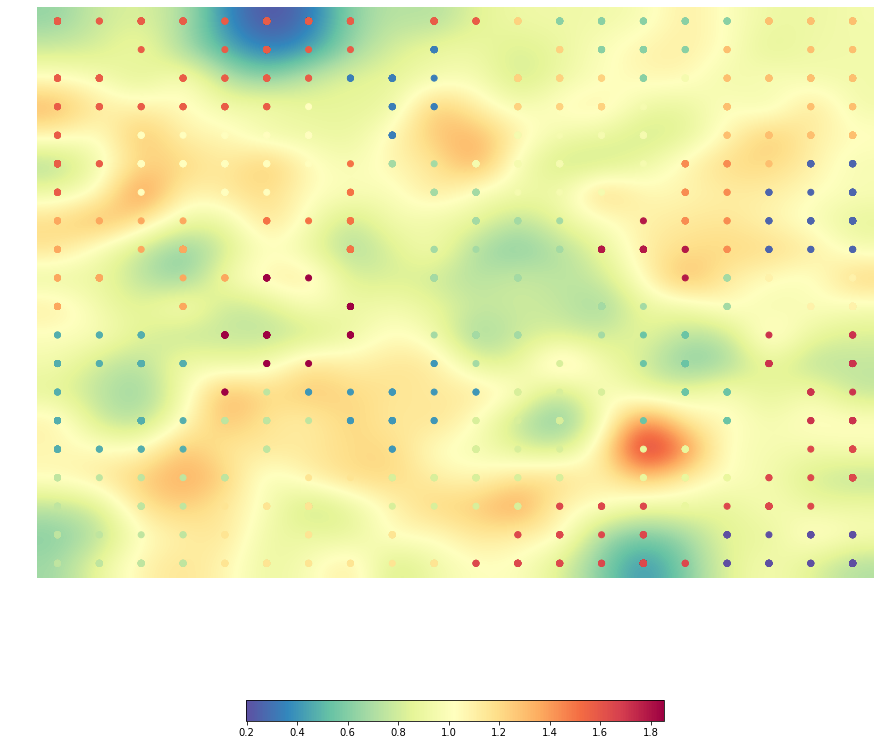

<module 'matplotlib.pyplot' from '/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [18]:
n_rows, n_columns = 20, 20
som_20_25_40 = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som_20_25_40.train(test_set, epochs = 40)


algorithm = KMeans(25)
som_20_25_40.cluster(algorithm=algorithm)

som_20_25_40.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [19]:
bmus_20_25_40 = som_20_25_40.bmus
ubmus_20_25_40, indices_20_25_40 = np.unique(bmus_20_25_40, return_inverse=True, axis=0)

len(ubmus_20_25_40)

307

CPU times: user 30min 19s, sys: 16.5 s, total: 30min 35s
Wall time: 15min 27s


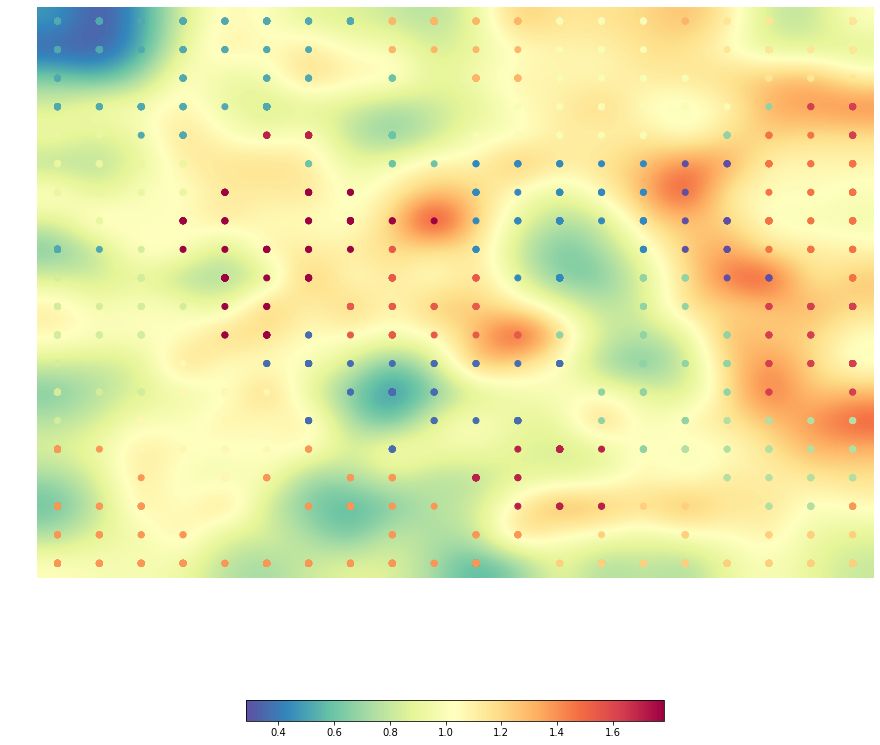

<module 'matplotlib.pyplot' from '/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [20]:
n_rows, n_columns = 20, 20
som_20_20_70 = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som_20_20_70.train(test_set, epochs = 70)


algorithm = KMeans(20)
som_20_20_70.cluster(algorithm=algorithm)

som_20_20_70.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [21]:
bmus_20_20_70 = som_20_20_70.bmus
ubmus_20_20_70, indices_20_20_70 = np.unique(bmus_20_20_70, return_inverse=True, axis=0)

len(ubmus_20_20_70)

312

CPU times: user 59min 37s, sys: 46 s, total: 1h 23s
Wall time: 30min 31s


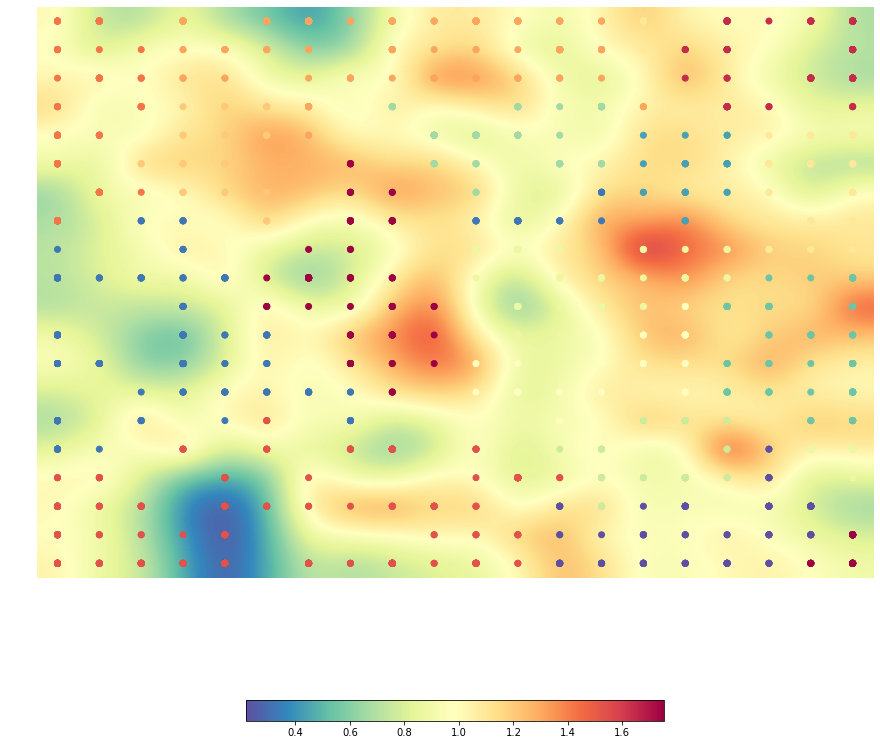

<module 'matplotlib.pyplot' from '/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [22]:
n_rows, n_columns = 20, 20
som_20_100 = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som_20_100.train(test_set, epochs = 100)


algorithm = KMeans(15)
som_20_100.cluster(algorithm=algorithm)

som_20_100.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [23]:
bmus_20_100 = som_20_100.bmus
ubmus_20_100, indices_20_100 = np.unique(bmus_20_100, return_inverse=True, axis=0)

len(ubmus_20_100)

304

CPU times: user 43min 4s, sys: 28.7 s, total: 43min 33s
Wall time: 22min 13s


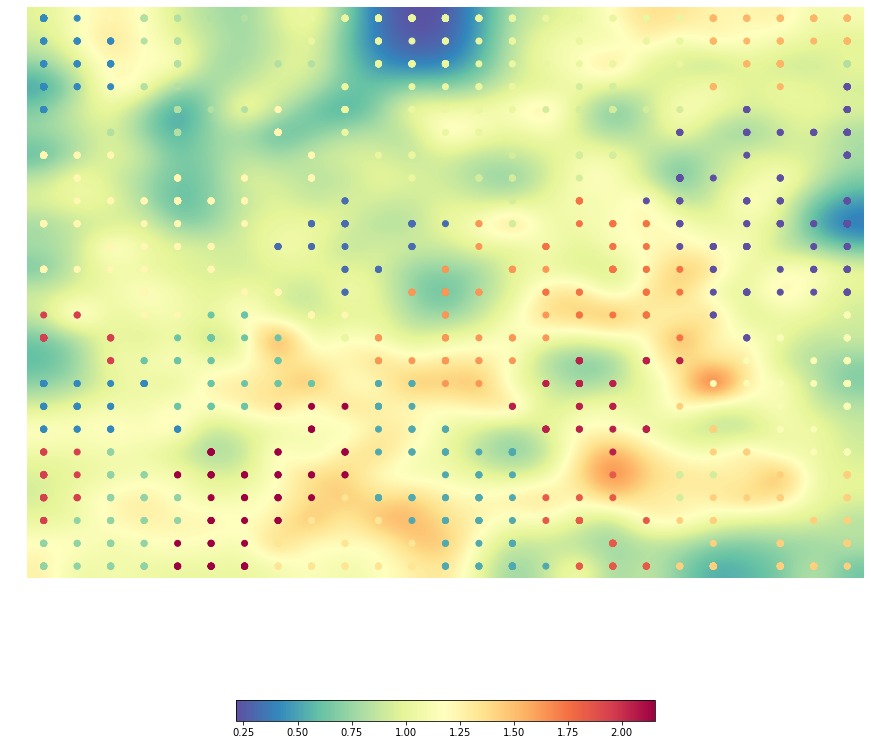

<module 'matplotlib.pyplot' from '/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [24]:
n_rows, n_columns = 25, 25
som_25_70 = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som_25_70.train(test_set, epochs = 70)


algorithm = KMeans(20)
som_25_70.cluster(algorithm=algorithm)

som_25_70.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [25]:
bmus_25_70 = som_25_70.bmus
ubmus_25_70, indices_25_70 = np.unique(bmus_25_70, return_inverse=True, axis=0)

len(ubmus_25_70)

430

CPU times: user 46min 39s, sys: 32.3 s, total: 47min 11s
Wall time: 23min 50s


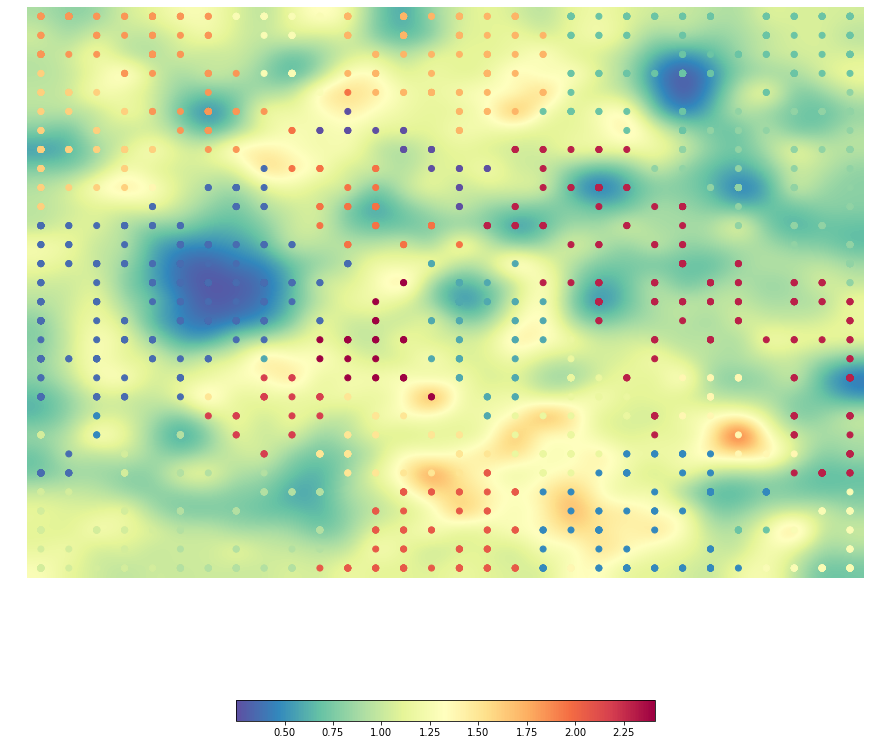

<module 'matplotlib.pyplot' from '/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [26]:
n_rows, n_columns = 30, 30
som_30_70 = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som_30_70.train(test_set, epochs = 70)


algorithm = KMeans(20)
som_30_70.cluster(algorithm=algorithm)

som_30_70.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [27]:
bmus_30_70 = som_30_70.bmus
ubmus_30_70, indices_30_70 = np.unique(bmus_30_70, return_inverse=True, axis=0)

len(ubmus_30_70)

554

CPU times: user 1h 9min 52s, sys: 46.7 s, total: 1h 10min 39s
Wall time: 35min 57s


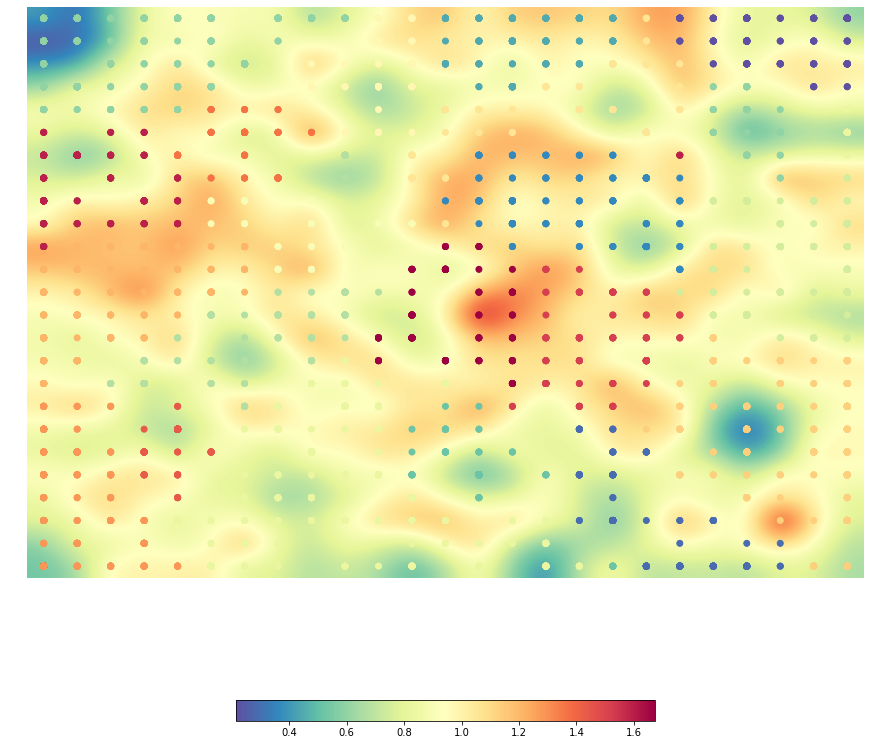

<module 'matplotlib.pyplot' from '/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [28]:
n_rows, n_columns = 25, 25
som_25_70_all = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som_25_70_all.train(final_set, epochs = 70)


algorithm = KMeans(20)
som_25_70_all.cluster(algorithm=algorithm)

som_25_70_all.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [30]:
bmus_25_70_all = som_25_70_all.bmus
ubmus_25_70_all, indices_25_70_all = np.unique(bmus_25_70_all, return_inverse=True, axis=0)

len(ubmus_25_70_all)

498

In [31]:
from sklearn.externals import joblib

joblib.dump(som_25_70_all, 'som_25_70_all.pkl')

['som_25_70_all.pkl']

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline
from sklearn.cluster import KMeans

In [35]:
som = joblib.load('som_25_70_all.pkl')

In [36]:
#som = som_10_10_100...
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)

len(ubmus)

498

In [41]:
import collections

In [119]:
def print_categories_stats(ids, max_genres=-1):
    total_categories = []

    for iid in ids:
        cat = categories[iid][0]
        total_categories.extend([cat_i.strip()[1:-1] for cat_i in cat.split(",")])

    if max_genres:
        return [cat for cat in collections.Counter(total_categories).most_common()[:max_genres]]
    
    return collections.Counter(total_categories).most_common()[:max_genres]

def print_cluster_neurons_movies_report(cluster, max_genres=-1):
    neurons = []
    rows, columns = np.where(cluster == som.clusters)
    cluster_bmus = np.column_stack((columns, rows))
    
    return print_categories_stats(neuron_movies_report(cluster_bmus), max_genres)
    
def neuron_movies_report(cluster_bmus):
    ids = []
    bmus_str = np.array([np.array2string(bmun) for bmun in bmus])
    for cbmu in cluster_bmus:
        indices = np.where(bmus_str == np.array2string(cbmu))[0]
        
        for i in indices:
            ids.append(i)
        
    return(ids)

In [127]:
test_k = [21]

for tk in test_k:
    print("---------------  Test k:{0} for KMeans  ---------------".format(tk))
    
    k = KMeans(tk)
    som.cluster(algorithm=k)
    
    bmus = som.bmus
    ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
    
    for cluster in range(tk):
        print("Cluster: {0}".format(cluster))
        print(print_cluster_neurons_movies_report(cluster, 5), "\n")
    print("-"*50 + "\n")

---------------  Test k:21 for KMeans  ---------------
Cluster: 0
[('Thriller', 232), ('Drama', 193), ('Mystery', 133), ('Crime Thriller', 131), ('Crime Fiction', 102)] 

Cluster: 1
[('Comedy', 415), ('Musical', 40), ('Parody', 39), ('Black-and-white', 38), ('Black comedy', 36)] 

Cluster: 2
[('Drama', 881), ('Romance Film', 131), ('Black-and-white', 87), ('Indie', 77), ('Family Film', 46)] 

Cluster: 3
[('Documentary', 109), ('Western', 67), ('Black-and-white', 65), ('Silent film', 64), ('Romance Film', 62)] 

Cluster: 4
[('Drama', 75), ('War film', 75), ('World cinema', 18), ('Black-and-white', 9), ('Biographical film', 8)] 

Cluster: 5
[('Action', 247), ('Action/Adventure', 109), ('Comedy', 83), ('Adventure', 56), ('Martial Arts Film', 46)] 

Cluster: 6
[('Action', 158), ('Thriller', 156), ('Action/Adventure', 149), ('Crime Fiction', 82), ('Drama', 46)] 

Cluster: 7
[('Crime Fiction', 174), ('Drama', 146), ('Thriller', 69), ('Black-and-white', 36), ('Mystery', 31)] 

Cluster: 8
[('R

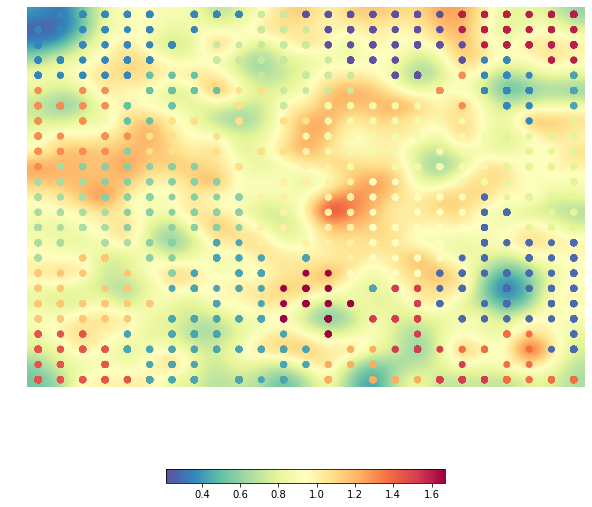

[[ 2  2  2  2  2  2  2  2  2  2  7  7  0  0  0  0  0  0  0 19 19 19 19 19
  19]
 [ 2  2  2  2  2  2  2  2  2  2  7  7  7  0  0  0  0  0  0 19 19 19 19 19
  19]
 [ 2  2  2  2  2  2  2  2  7  7  7  7  7  0  0  0  0  0  0  0 19 19 19 19
  19]
 [ 2  2  2  2  2  2  2  7  7  7  7  7  7  7  0  0  0  0  0  0  2  2 19 19
  19]
 [ 2  2  2  2  2  4  4  4  7  7  7  7  7  7  7  0  0  0  0 15  2  2  2  3
   3]
 [15 15 15 15  4  4  4  4  4 12 12  7  7  7  7  9  0  0 15 15  2  2  2  3
   3]
 [15 15 15 15  4  4  4  4 12 12 12  7  7  9  9  9  9  9 15 15  2  2  2  3
   3]
 [15 15 15 15  4  4 12 12 12 12 12 12 12  9  9  9  9  9  9  9  9  2  2  8
   8]
 [15 15 15 15 15 12 12 12 12 12 12 12  9  9  9  9  9  9  9  9  9  8  8  8
   8]
 [15 15 15 15  5 12 12 12 12 12 12 12 11  9  9  9  9  9  9  9  9  8  8  8
   8]
 [15  6  5  5  5  5  5  5 12 12 12 11 11 11  9  9  9  9  9  9  9  8  8  8
   8]
 [ 6  6  6  5  5  5  5  5  5 12 11 11 11 11 11 10 10  9  9  9  9  8  8  8
   8]
 [ 6  6  6  5  5  5  5  5  5  5 11 11 11

In [128]:
def cluster_report(som):
    som.view_umatrix(bestmatches=True, figsize=(10, 10), colorbar=True)
    print(som.clusters)

    _, cnts = np.unique(som.clusters, return_counts=True)
    sorted_indices = np.argsort(cnts)

    print("\nClusters sorted by increasing number of neurons:")
    print("First row : Cluster index\nSecond row : Number of neurons")
    print(np.vstack((sorted_indices, cnts[sorted_indices])))
    
cluster_report(som)

In [125]:
algorithm = KMeans(21)
som.cluster(algorithm=algorithm)

In [118]:
test_k = [18, 19, 20, 21, 32, 23, 24, 25, 26, 27]

for tk in test_k:
    print("Test k:{0} for KMeans".format(tk))
    
    k = KMeans(tk)
    som.cluster(algorithm=k)
    
    bmus = som.bmus
    ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
    
    for cluster in range(tk):
        print("Cluster: {0}".format(cluster))
        print(print_cluster_neurons_movies_report(cluster, 5))
        print("-"*50)

Test k:18 for KMeans
Cluster: 0


TypeError: print_cluster_neurons_movies_report() takes 1 positional argument but 2 were given

##### 